# Consumption-Savings - Cash-in-Advance constraint

In [1]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm         # tqdm is a nice library to visualize ongoing loops
import datetime
# followint lines are used for indicative typing
from typing import Tuple
class Vector: pass

2023-01-28 14:48:41.055683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-01-28 14:48:48.712772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Text(0.5, 1.0, 'test')

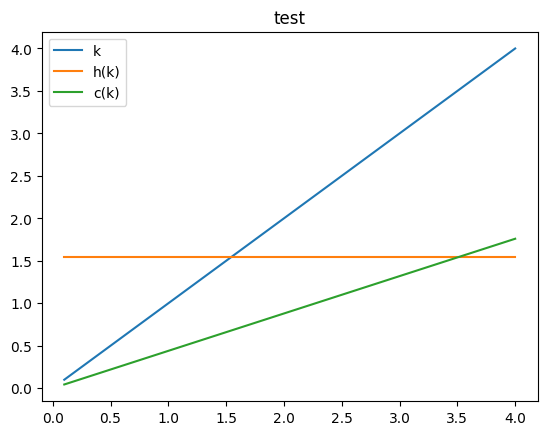

In [2]:
# Model parameters
r = 1.04
γ = 2.0
β = 0.9 
σ = 0.0001
wmin=0.1
wmax=4.0
min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)
layers = [
    tf.keras.layers.Dense(32, activation='relu', input_dim=2, bias_initializer='he_uniform'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.linear)
]
perceptron = tf.keras.Sequential(layers)

def model(y:Vector,w:Vector)->Tuple[Vector,Vector]:
    y = y/σ/2.0
    w = (w-wmin)/(wmax-wmin)*2.0-1.0
    s = tf.concat([i[:,None] for i in [y,w]],axis=1)
    x = perceptron(s)
    sh = tf.sigmoid(x[:,0])
    h = tf.exp(x[:,1])
    return (sh,h)

wvec = np.linspace(wmin,wmax,100,dtype='float32')
shvec, hvec = model(wvec*0,wvec*0)

plt.plot(wvec, wvec, label = 'k')
plt.plot(wvec, hvec, label='h(k)')
plt.plot(wvec, shvec*wvec, label = 'c(k)')
plt.legend()
plt.title('test')

In [3]:
def residuals(e:Vector,y:Vector,w:Vector):
    n = tf.size(y)
    sh,h=model(y,w)
    c=sh*w
    yp=e
    wp=tf.exp(yp)+(w-c)*r
    shp,hp=model(yp,wp)
    cp = shp*wp
    R1 = β*(cp/c)**(-γ)*r-h
    R2 = min_FB(1-h,1-sh)
    return (R1,R2)

residuals(wvec,wvec,wvec)

(<tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)>,
 <tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf

In [4]:
def J(n):
    y = tf.random.normal(shape=(n,),stddev=σ)
    w = tf.random.uniform(shape=(n,),minval=wmin,maxval=wmax)
    e1 = tf.random.normal(shape=(n,),stddev=σ)
    e2 = tf.random.normal(shape=(n,),stddev=σ)
    R1_e1, R2_e1 = residuals(e1, y, w)
    R1_e2, R2_e2 = residuals(e2, y, w)
    R_squared = R1_e1*R1_e2+R2_e1*R2_e2
    return tf.reduce_mean(R_squared)

In [5]:
n = 128
v = J(100)
v.numpy()

0.75728035

In [6]:
θ = perceptron.trainable_variables
print(str(θ)[:1000])

[<tf.Variable 'dense/kernel:0' shape=(2, 32) dtype=float32, numpy=
array([[ 0.133553  , -0.14477235,  0.29604563, -0.09439597,  0.24545273,
        -0.38638338,  0.04873061, -0.27495962, -0.08158964,  0.02358589,
         0.35385367,  0.22596207, -0.19905633,  0.09521517,  0.39961407,
         0.20447907,  0.2367697 , -0.072759  , -0.34054717, -0.16570061,
         0.12376675,  0.12577972,  0.32798442, -0.2367642 , -0.00343624,
         0.3740405 ,  0.26615885, -0.31803566,  0.28901932, -0.20450631,
         0.2109358 , -0.29993019],
       [-0.10631073, -0.07982391,  0.22534332,  0.11688259,  0.29043338,
        -0.14615771,  0.171015  ,  0.36257616, -0.28769696, -0.41367045,
         0.20945188, -0.3631144 , -0.2338087 , -0.3811866 , -0.19423242,
         0.1388835 , -0.16628003,  0.22042856, -0.2036128 , -0.16385365,
         0.0255872 , -0.17503475, -0.36740467, -0.2001993 ,  0.28021708,
         0.14962932,  0.20531115,  0.03687418, -0.28270447, -0.36655495,
         0.24862745,  

In [7]:
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = Adam()

In [8]:
@tf.function
def training_step():
    
    with tf.GradientTape() as tape:
        xx = J(n)
        
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

results = train_me(5000)

  0%|                                                                | 0/5000 [00:00<?, ?it/s]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


100%|████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 400.28it/s]


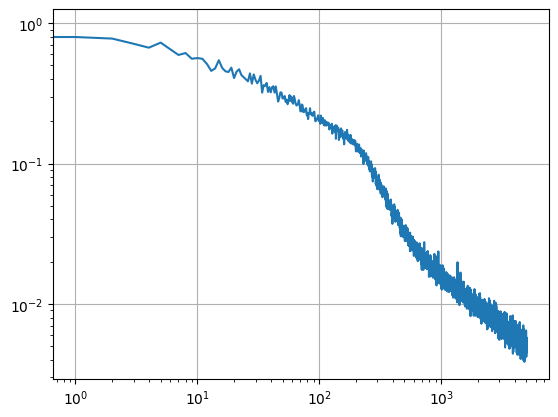

In [9]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

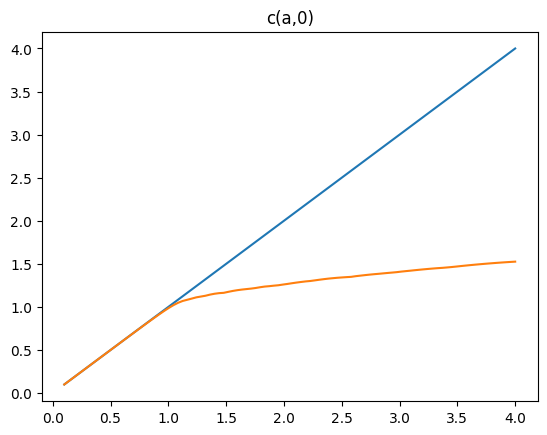

In [10]:
wvec = np.linspace(wmin,wmax,100,dtype='float32')
shvec,hvec = model(wvec*0,wvec)
plt.title('c(a,0)')
plt.plot(wvec,wvec)
plt.plot(wvec,shvec*wvec)
plt.show()